In [21]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/04_solvent_chi_pore/py_files')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib import cm
from matplotlib.colors import Normalize
from create_in import create_in
from out_reader import out_reader

In [22]:
Cs_values = [0.04, 0.005]

chi_range = np.linspace(1, 2, num = 6)
alpha = 0.35
S = 150

D = 120
N = 300
chi_surf = -0.3

In [23]:
# Функция для вычисления профилей
def compute_profiles(Cs, chi_range, alpha):
    phi_SCF = {}
    for chi in chi_range:
        # Генерируем имя файла и создаем SCF-инпут
        file_name_pro = create_in(
            template_pore='/home/tpopova/prj/PB_SCF/04_solvent_chi_pore/scf_templates/pore_chi.in',
            range_param='chi',
            min_val=0.1,
            max_val=0.1,
            Cs=Cs,
            chi=chi,
            chi_surf=chi_surf,
            D=D,
            N=N,
            S=S,
            alpha=alpha,
        )
        
        # Парсим профили
        phi_brush, phi_end_brush = out_reader(file_names=file_name_pro)
        
        # Сохраняем результаты
        coord = np.arange(D)
        phi_SCF[chi] = (coord, phi_brush)
    return phi_SCF

In [24]:
# Вычисление профилей для разных значений Cs
phi_SCF_alpha_0_3_0_04 = compute_profiles(Cs=0.04, chi_range=chi_range, alpha=alpha)
phi_SCF_alpha_0_3_0_001 = compute_profiles(Cs=0.005, chi_range=chi_range, alpha=alpha)

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 1.946214e+00 |g| = 4.609477e+00 alpha = 1.000000e+00 
hessian scaling: 1.09389
it =  1  E = 1.757483e+00 |g| = 4.134714e+00 alpha = 1.216944e-01 
it =  2  E = 2.308884e+00 |g| = 4.288318e+00 alpha = 6.874461e-02 
it =  3  E = 2.340696e+00 |g| = 3.964851e+00 alpha = 5.763392e-02 
it =  4  E = 2.522744e+00 |g| = 3.563625e+00 alpha = 4.157751e-02 
it =  5  E = 1.767190e+00 |g| = 3.518690e+00 alpha = 7.829698e-02 
it =  6  E = 2.004903e+00 |g| = 3.143145e+00 alpha = 5.084846e-02 
it =  7  E = 1.439047e+00 |g| = 3.025511e+00 alpha = 8.948649e-02 
it =  8  E = 1.570796e+00 |g| = 2.674115e+00 alpha = 6.260432e-02 
it =  9  E = 1.162369e+00 |g| = 2.571719e+00 alpha = 1.042218e-01 
it =  10  E = 1.255265e+00 |g| = 2.198434e+00

<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2285411/2759675008.py:12: SyntaxWarning: invalid escape sequence '\c'
  axes[0].plot(coord, phi_brush, label=f"$\chi$ = {chi}", color=color, linewidth=2)
/tmp/ipykernel_2285411/2759675008.py:21: SyntaxWarning: invalid escape sequence '\c'
  axes[1].plot(coord, phi_brush, label=f"$\chi$ = {chi}", color=color, linewidth=2)


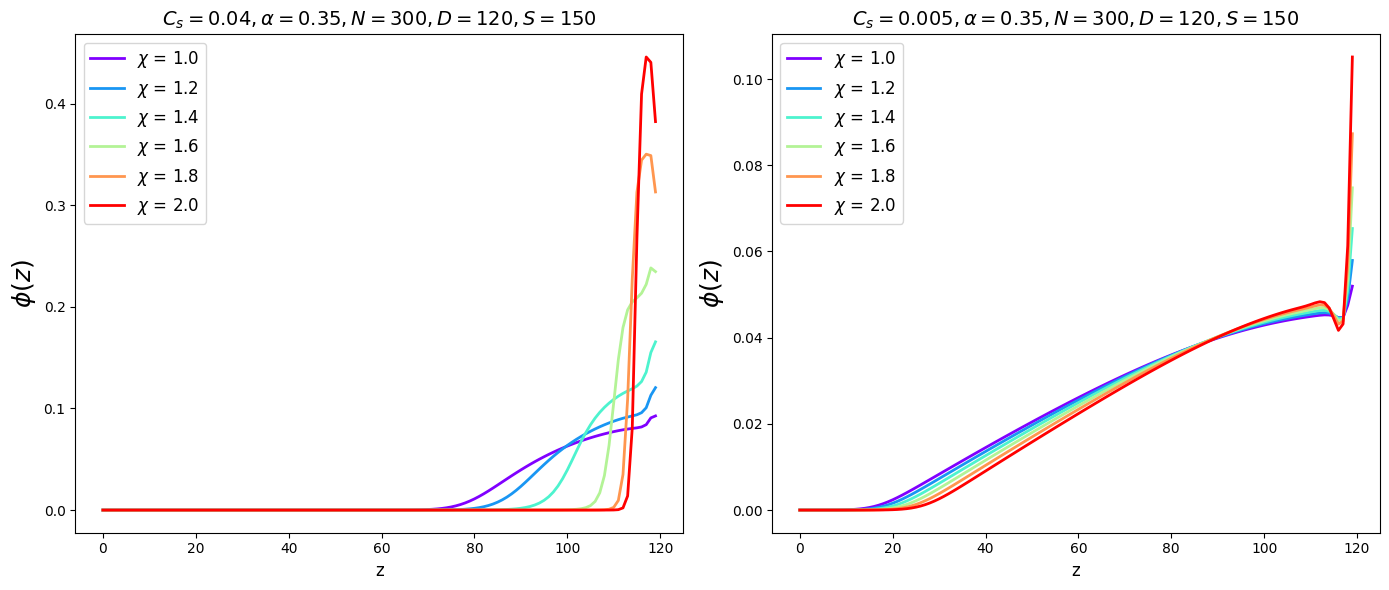

In [28]:
# Построение графиков
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 2 графика в одном ряду

# Количество кривых для нормализации цветов
norm = Normalize(vmin=min(chi_range), vmax=max(chi_range))  # Нормализуем диапазон для палитры
cmap = cm.rainbow  # Используем палитру plasma

# График для Cs = 0.04
axes[0].set_title(f"$C_s = 0.04, \\alpha = {alpha}, N = {N}, D = {D}, S = {S}$", fontsize=14)
for i, (chi, (coord, phi_brush)) in enumerate(phi_SCF_alpha_0_3_0_04.items()):
    color = cmap(norm(chi))  # Получаем цвет из палитры plasma
    axes[0].plot(coord, phi_brush, label=f"$\chi$ = {chi}", color=color, linewidth=2)
axes[0].set_xlabel("z", fontsize=12)
axes[0].set_ylabel(r"$\phi(z)$", fontsize=18)
axes[0].legend(fontsize=12)

# График для Cs = 0.001
axes[1].set_title(f"$C_s = 0.005, \\alpha = {alpha}, N = {N}, D = {D}, S = {S}$", fontsize=14)
for i, (chi, (coord, phi_brush)) in enumerate(phi_SCF_alpha_0_3_0_001.items()):
    color = cmap(norm(chi))  # Получаем цвет из палитры plasma
    axes[1].plot(coord, phi_brush, label=f"$\chi$ = {chi}", color=color, linewidth=2)
axes[1].set_xlabel("z", fontsize=12)
axes[1].set_ylabel(r"$\phi(z)$", fontsize=18)
axes[1].legend(fontsize=12)

# Настройки и отображение
plt.tight_layout()
# plt.savefig('0_4_00_5_cs_alpha_0.35.pdf', dpi=300, bbox_inches='tight')
plt.show()